In [1]:
import os, sys
sys.path.append('../')
from tqdm import tqdm
import random
from env import *

from algorithms.optimal_policy import *

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(os.getcwd())

/Users/optalab/Documents/UCMLK/search


In [3]:
nState = 6
T = 3000
env = make_riverSwim(T=T, nState=nState)
# env = make_randomMDP(T=Round, nState=7, nAction=2, reward_range=(0,1), sparsity=0.3)
# env = make_hardToLearnMDP(T=Round)
runs = 10
seeds = [1234*(i+1) for i in range(runs)]

In [4]:
run_returns = []
run_state_returns = []
for run in tqdm(range(runs)):
    
    random.seed(seeds[run])
        
    agent = Optimal_Policy(env, T = T)    
    episodic_return, state_return = agent.run()
    run_returns.append(episodic_return)
    run_state_returns.append(state_return)
    # np.save('C:/Users/uqpua/OneDrive/Desktop/UCMLK/data/riverSwim/S=' + str(nState)+ ', T=' + str(10000) +'/Optimal Policy/return'+str(run)+'.npy', episodic_return)
    # np.save('C:/Users/uqpua/OneDrive/Desktop/UCMLK/data/riverSwim/S=' + str(nState)+ ', T=' + str(10000) +'/Optimal State/state'+str(run)+'.npy', state_return)
    np.save('/Users/optalab/Documents/UCMLK/data/riverSwim/S=' + str(nState)+ ', T=' + str(10000) +'/Optimal Policy/return'+str(run)+'.npy', episodic_return)
    np.save('/Users/optalab/Documents/UCMLK/data/riverSwim/S=' + str(nState)+ ', T=' + str(10000) +'/Optimal State/state'+str(run)+'.npy', state_return)

  0%|          | 0/10 [00:00<?, ?it/s]

Go to the Right!
Go to the Right!
Go to the Right!
Go to the Right!
Go to the Right!
Go to the Right!
Go to the Right!
Go to the Right!
Go to the Right!
Go to the Right!


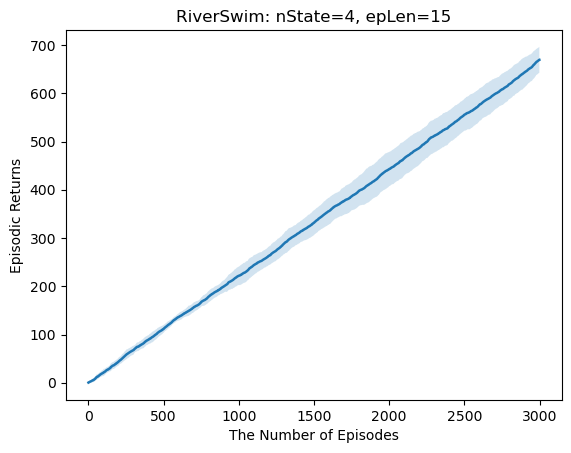

In [5]:
episodes = np.arange(T)

plt.figure()
data_mean = np.mean(run_returns, axis=0)
data_std = np.std(run_returns, axis=0)
    
plt.fill_between(episodes, data_mean + data_std, data_mean - data_std, alpha=0.2)
plt.plot(episodes, data_mean, linewidth=1.8)
plt.title("RiverSwim: nState=4, epLen=15")
plt.xlabel("The Number of Episodes")
plt.ylabel("Episodic Returns")
plt.show()